In [1]:
# Orig. code at: https://codeberg.org/thpit/deterministic_bootstrapping/

# python 3 code
# Requires: numpy
# Optional: matplotlib

import sys
sys.path.append('ver2022')

import numpy as np
from ver2022.DBT1d import DBT1d
import matplotlib.pyplot as plt


In [3]:
n = 15
m = 15

# Values as seen in:
#  "A handbook of small data sets", D.J.Hand et al, 1994, 1st ed., Chapman Hill, pg 2. SK850 H236
# Format [i:j], j=0 (cross-fertilized), j=1 (self-fertilized), i = index of plant pair
heights = np.array([
    [23.5,17.4],
    [12.0,20.4],
    [21.0,20.0],
    [22.0,20.0],
    [19.1,18.4],
    [21.5,18.6],
    [22.1,18.6],
    [20.4,15.3],
    [18.3,16.5],
    [21.6,18.0],
    [23.3,16.3],
    [21.0,18.0],
    [22.1,12.8],
    [23.0,15.5],
    [12.0,18.0]])

X = heights[:,0] - heights[:,1]
Xc = X - np.mean(X)

# Equally weighted samples:
a = np.ones(m)/m



In [4]:
# Or alternatively using the data as quoted in Fisher's DOE:
# (vals in inches)
heights = np.array([
    [23.5,17.375],
    [12.0,20.375],
    [21.0,20.0],
    [22.0,20.0],
    [19.125,18.375],
    [21.5,18.625],
    [22.125,18.625],
    [20.375,15.25],
    [18.25,16.5],
    [21.625,18.0],
    [23.25,16.25],
    [21.0,18.0],
    [22.125,12.75],
    [23.0,15.5],
    [12.0,18.0]
])
#X = np.array([49, -67, 8, 16, 6, 23, 28, 41, 14, 29, 56, 24, 75, 60, -48]) / 8
X = heights[:,0] - heights[:,1]
Xc = X - np.mean(X)

a = np.ones(m)/m
print(X*8)

[ 49. -67.   8.  16.   6.  23.  28.  41.  14.  29.  56.  24.  75.  60.
 -48.]


In [5]:
n = len(X)
print('mean(X):                 {0}'.format(np.mean(X)))
print('emp. var(X):             {0}'.format(sum(Xc*Xc)/(n-1)))
print('std err(X):              {0}'.format(np.sqrt(sum(Xc*Xc)/(n-1))))
print('var(X) div n times a^2:  {0}'.format(sum(Xc*Xc)/n*sum(np.array(a)*np.array(a))))


mean(X):                 2.6166666666666667
emp. var(X):             22.259970238095235
std err(X):              4.718047290786225
var(X) div n times a^2:  1.3850648148148146


In [6]:
N = 1000
z_vals, f_Z = DBT1d.compute(a, X, N)


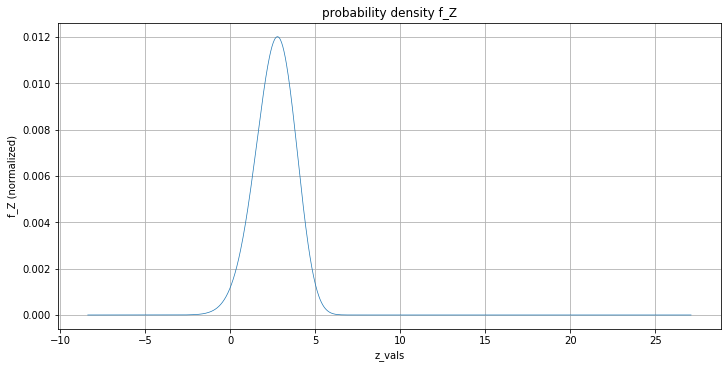

In [8]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(z_vals, f_Z, lw=0.7)
ax.set_xlabel('z_vals')
ax.set_ylabel('f_Z (normalized)')
ax.set_title('probability density f_Z')
plt.grid(True)
plt.show()

#plt.tight_layout()

In [10]:
cdf_Z = DBT1d.get_cdf(z_vals, f_Z)
print(DBT1d.get_expectation(z_vals, cdf_Z))
#print(dbt1.dbt_get_variance_div_N(f_Z, z_vals))

2.6166666666669056


In [12]:
print(len(cdf_Z))
print(cdf_Z[850:999])

1000
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


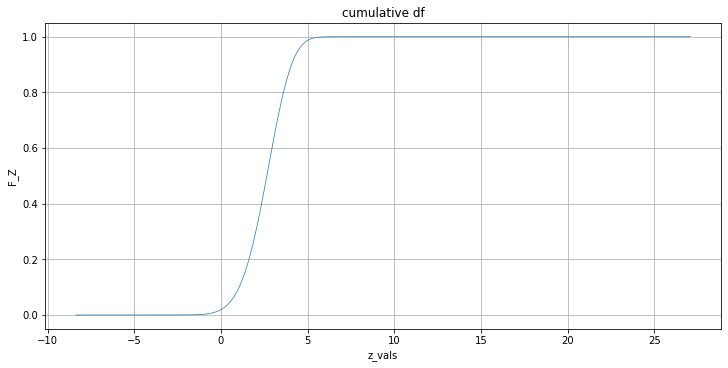

In [13]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(z_vals, cdf_Z, lw=0.7)
ax.set_xlabel('z_vals')
ax.set_ylabel('F_Z')
ax.set_title('cumulative df')
plt.grid(True)
plt.show()

# see pdf for a discussion on interpretability of the below graph